## Name - Avinash Adsare

## Roll No - 43501

# Assignment No 2

## Implementing Feed-forward neural networks with Keras and TensorFlow

 a. Import the necessary packages<br>
 b. Load the training and testing data (MNIST/CIFAR10)<br>
 c. Define the network architecture using Keras<br>
 d. Train the model using SGD<br>
 e. Evaluate the network<br>
 f. Plot the training loss and accuracy

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 

## Loading the dataset (MNIST)
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [3]:
# length of traning dataset
len(x_train)

60000

In [4]:
# length of test dataset
len(x_test)

10000

In [5]:
# shape of the traning dataset -> 60000 images of 28*28 size
x_train.shape

(60000, 28, 28)

In [6]:
# shape of the traning dataset -> 10000 images of 28*28 size
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

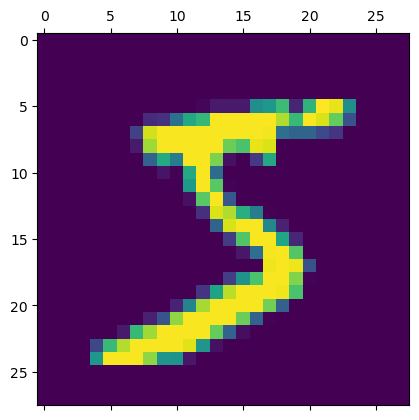

In [8]:
# to see how the first test image looks
plt.matshow(x_train[0])


In [9]:
# Normalize the pixel values of images in the range of 0-1
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Creating Model
The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
## Applying the SGD Optimizer
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [14]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.6538 - accuracy: 0.8325 - val_loss: 0.3580 - val_accuracy: 0.9030
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3354 - accuracy: 0.9073 - val_loss: 0.2916 - val_accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2866 - accuracy: 0.9204 - val_loss: 0.2596 - val_accuracy: 0.9296
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2562 - accuracy: 0.9286 - val_loss: 0.2360 - val_accuracy: 0.9342
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2337 - accuracy: 0.9347 - val_loss: 0.2188 - val_accuracy: 0.9403
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2159 - accuracy: 0.9398 - val_loss: 0.2040 - val_accuracy: 0.9435
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2006 - accuracy: 0.9437 - val_loss: 0.1918 - val_ac

## Model Evaluate 

In [15]:
model.evaluate(x_test,y_test) 

313/313 [==============================] - 2s 7ms/step - loss: 0.1622 - accuracy: 0.9542


[0.162205770611763, 0.954200029373169]

## Making Prediction on new data

In [16]:
model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


array([[7.7193225e-05, 9.4370748e-08, 3.1140569e-04, ..., 9.9727648e-01,
        9.9110730e-06, 1.3745650e-04],
       [6.3666899e-04, 1.0574056e-04, 9.8921049e-01, ..., 8.1182634e-09,
        3.1663399e-04, 7.0154202e-09],
       [2.4729214e-05, 9.8399287e-01, 5.2457019e-03, ..., 4.5674201e-03,
        1.3365395e-03, 3.0775490e-04],
       ...,
       [5.7631809e-08, 4.5233829e-08, 4.3863756e-06, ..., 2.0164237e-04,
        2.1029199e-03, 6.1821984e-03],
       [5.4609278e-05, 1.0536156e-04, 2.6354615e-05, ..., 2.6445389e-06,
        6.6380599e-03, 1.8887064e-05],
       [1.4174915e-05, 1.5094327e-09, 1.4900765e-04, ..., 6.6183786e-10,
        9.8607252e-08, 1.1904194e-08]], dtype=float32)

In [17]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

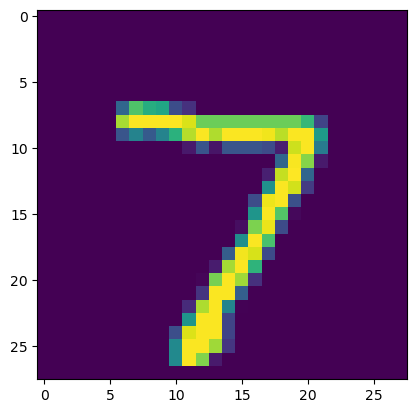

In [18]:
plt.imshow(x_test[0])

## Plot graph for Accuracy and Loss

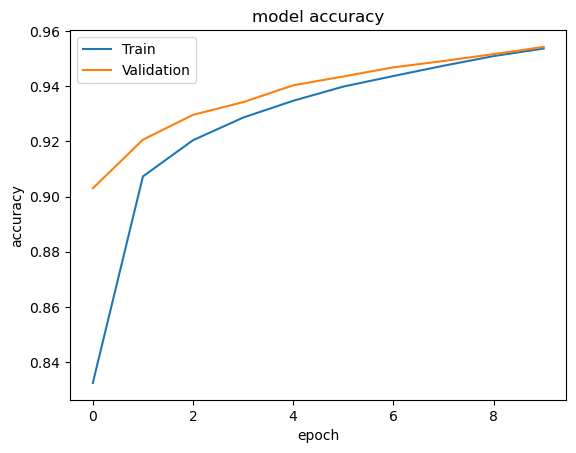

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

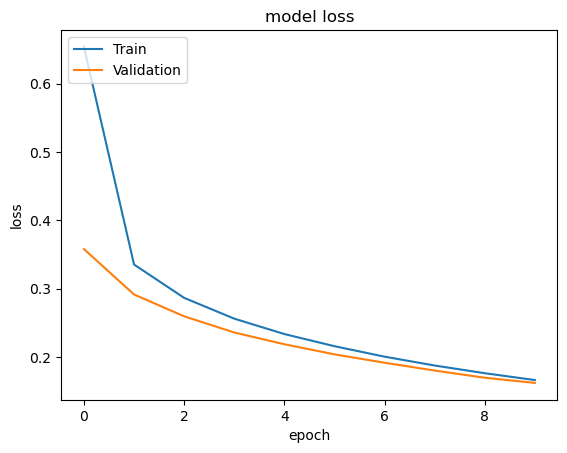

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
